In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [9]:
data = yf.download("VET-USD", start="2020-10-01", end="2022-10-01")

[*********************100%***********************]  1 of 1 completed


In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,0.013531,0.013653,0.012542,0.012736,0.012736,146888243
2020-10-02,0.012743,0.012879,0.011556,0.011876,0.011876,169635034
2020-10-03,0.011873,0.012163,0.011746,0.011746,0.011746,113148011
2020-10-04,0.011751,0.011866,0.011384,0.011683,0.011683,121509514
2020-10-05,0.011682,0.011887,0.011282,0.011388,0.011388,124456795


In [11]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-26,0.022426,0.022825,0.021956,0.022703,0.022703,64909448
2022-09-27,0.022703,0.023941,0.022459,0.022651,0.022651,79051591
2022-09-28,0.022644,0.023068,0.021861,0.022888,0.022888,64975063
2022-09-29,0.022892,0.023473,0.022693,0.023469,0.023469,62826073
2022-09-30,0.023468,0.023859,0.022780,0.023059,0.023059,62075770


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

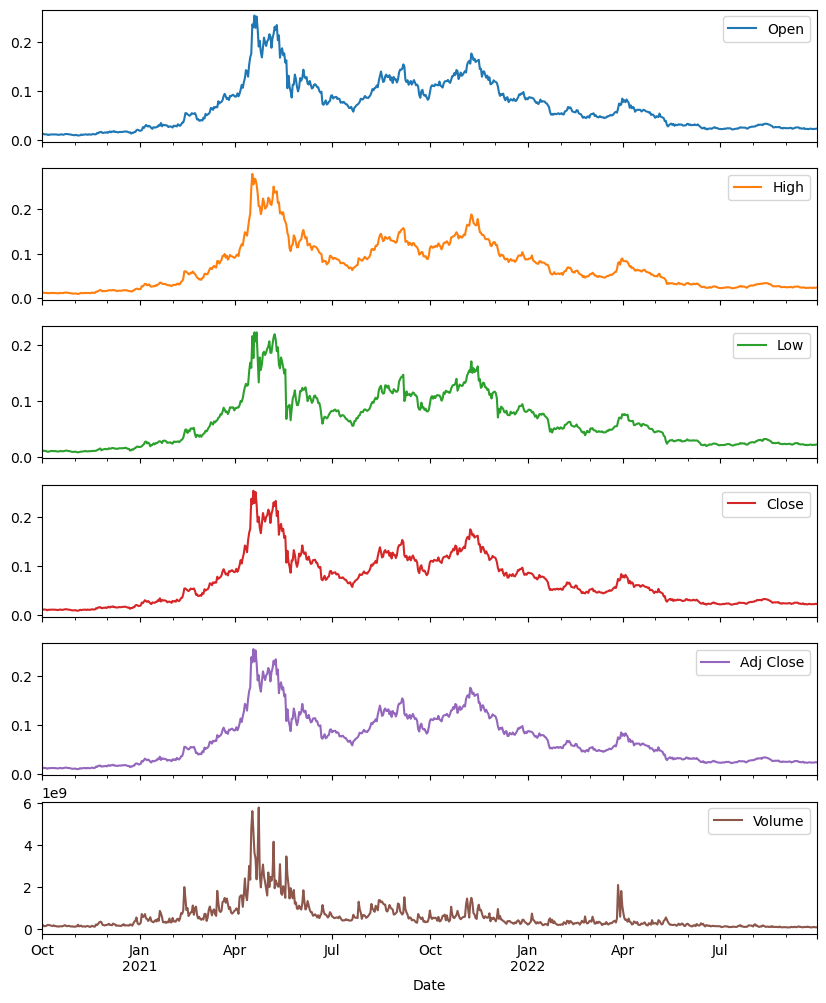

In [12]:
data.plot(figsize=(10, 12), subplots=True)

In [13]:
data = yf.download("VET-USD", start="2021-10-01", end="2022-01-01")

[*********************100%***********************]  1 of 1 completed


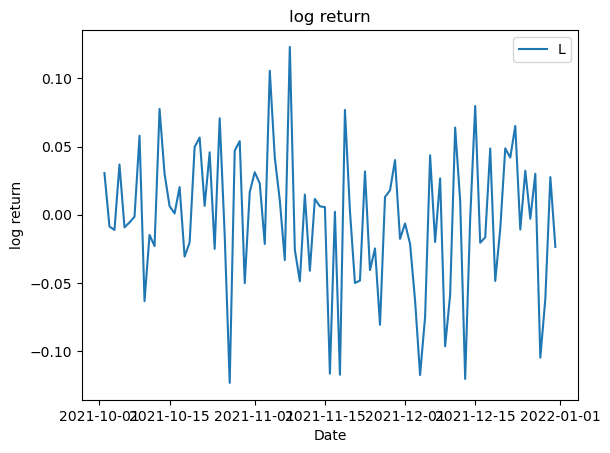

In [59]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
fig = plt.figure()
plt.plot(log_return)
# plt.plot(log_return, np.maximum(S-0.019,0), '--')
plt.xlabel('Date')
plt.ylabel('log return')
plt.title('log return')
plt.legend('Log return')
plt.show()

In [15]:
vol = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 98.41 %


# Black-Scholes Model

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [21]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [22]:
S = 0.019
K = 0.030
T = 0.25   # 3 Months time period
r = 0.03
q = 0
vol=0.98

In [23]:
euro_option_bs(S, K, T, r, vol, 'call')

0.0011139989619412855

In [24]:
S = np.linspace(0.001,0.03,50)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 0.030, 0.25, 0.03, 0.98, 'call')


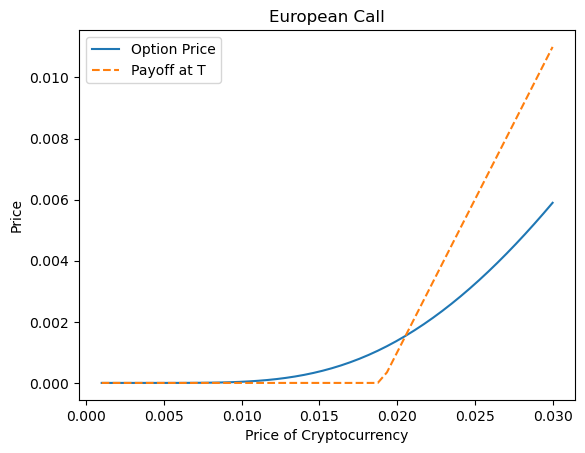

In [25]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-0.019,0), '--')
plt.xlabel('Price of Cryptocurrency')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

# Monte-Carlo Simulation

In [26]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [27]:
T = 0.25
r = 0.03
sigma = 0.98
S0 = 0.019
K = 0.030

In [28]:
S = mcs_simulation_np(1000)


In [29]:
S = np.transpose(S)
S


array([[0.019     , 0.01904698, 0.01917788, ..., 0.01059454, 0.01040692,
        0.01042672],
       [0.019     , 0.0189888 , 0.01873662, ..., 0.03065803, 0.03074373,
        0.03050317],
       [0.019     , 0.01922077, 0.01927704, ..., 0.01510187, 0.01500906,
        0.01532225],
       ...,
       [0.019     , 0.01887121, 0.0187212 , ..., 0.01938262, 0.01944079,
        0.01974274],
       [0.019     , 0.01966293, 0.01973407, ..., 0.01721031, 0.0176043 ,
        0.01746518],
       [0.019     , 0.01869262, 0.01910768, ..., 0.01741556, 0.01727757,
        0.0174278 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

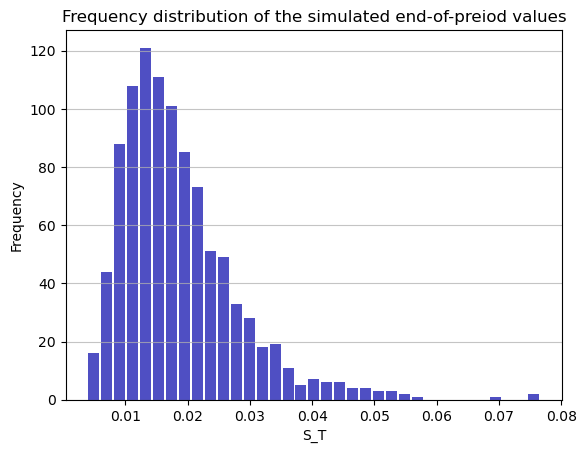

In [30]:

import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [31]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))


European call 0.0009342411082862519


# Greeks

## Delta

In [32]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [33]:
S = np.linspace(0.001, 0.030, 50)
T = np.linspace(0.10, 0.50, 50)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 0.030, T[i], 0.03, 0, 0.98, 'call')

In [34]:

delta(0.019, 0.030, 0.25,0.03 , 0, 0.98, 'call')

0.2508383610120836

## Gamma

In [35]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [36]:
S = np.linspace(0.001, 0.030, 50)
T = np.linspace(0.10, 0.50, 50)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 0.030, T[i], 0.03, 0, 0.98, 'call')

C:\Users\HP\AppData\Local\Temp\ipykernel_9076\3894109105.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


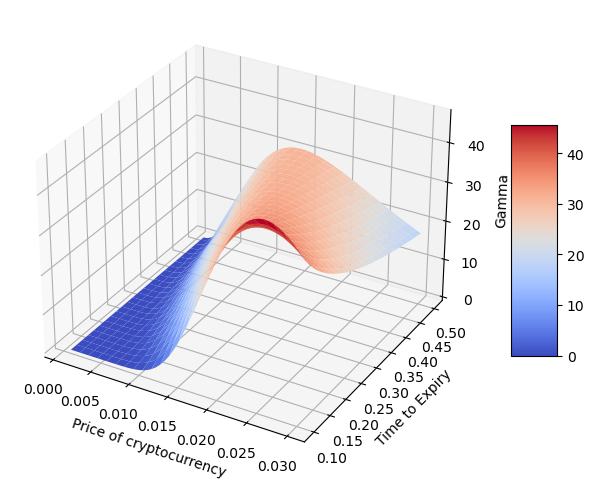

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [38]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [39]:
gamma(0.019, 0.030, 0.25, 0.03, 0, 0.98, 'call')

34.19344074787023

In [40]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [41]:
S = np.linspace(0.001, 0.030, 50)
T = np.linspace(0.10, 0.50, 50)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 0.030, T[i], 0.03, 0, 0.98, 'call')

In [44]:
speed(0.019, 0.030, 0.25, 0.03, 0, 0.98, 'call')

333.9532739510514

In [45]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [46]:
S = np.linspace(0.001, 0.50, 50)
T = np.linspace(0.01, 0.50, 50)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 0.030, T[i], 0.03, 0, 0.98, 'call')

C:\Users\HP\AppData\Local\Temp\ipykernel_9076\1244808799.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


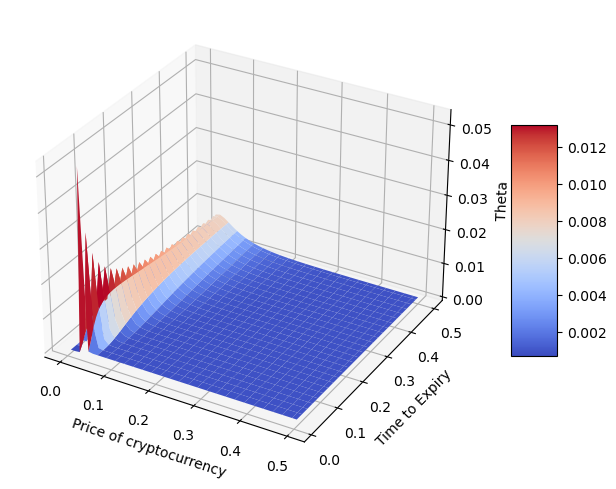

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [48]:
theta(0.019, 0.030, 0.25, 0.03, 0, 0.98, 'call')

0.006037066076131597

## Rho

In [49]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [50]:
S = np.linspace(0.001, 0.030, 50)
T = np.linspace(0.01, 0.50, 50)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 0.019, T[i], 0.03, 0, 0.98, 'call')

C:\Users\HP\AppData\Local\Temp\ipykernel_9076\3951647113.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


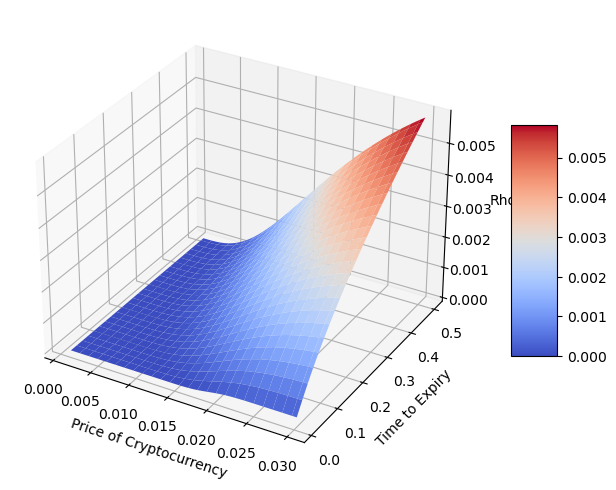

In [51]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of Cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [52]:
rho(0.019, 0.030, 0.25, 0.03, 0, 0.98, 'call')


0.0009129824743220758